# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


# EDA

## Reading the data

In [2]:
df = pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv')
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
503,504,55,Male,Shoes,Footwear,24,West Virginia,M,Lavender,Summer,3.2,Yes,Next Day Air,Yes,Yes,26,Bank Transfer,Quarterly
2534,2535,41,Male,Sunglasses,Accessories,42,Virginia,XL,Red,Fall,3.2,No,Free Shipping,No,No,22,Cash,Weekly
2785,2786,53,Female,Blouse,Clothing,80,Louisiana,S,Green,Summer,2.9,No,Next Day Air,No,No,13,Bank Transfer,Monthly
2973,2974,25,Female,Boots,Footwear,65,Indiana,M,Blue,Summer,2.7,No,Store Pickup,No,No,3,Bank Transfer,Fortnightly
2766,2767,66,Female,Dress,Clothing,91,Tennessee,M,Cyan,Winter,2.8,No,Standard,No,No,47,Credit Card,Monthly


### Knowing number of columns, checking if there is null data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


our data is clean and there is no null data 

In [5]:
df.shape

(3900, 18)

<Axes: xlabel='Gender', ylabel='count'>

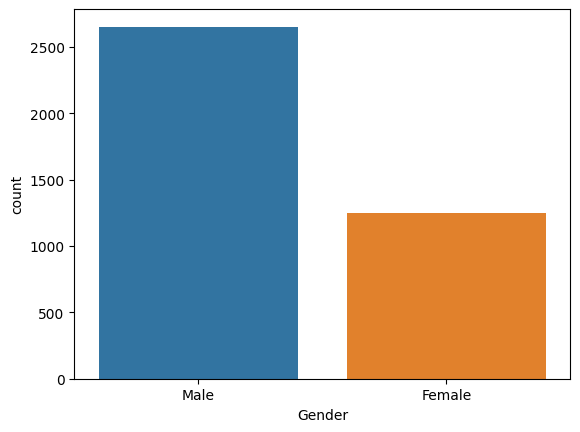

In [6]:
sn.countplot(x='Gender', data=df)

Number of males is nearly double the females

## Pie Chart Showing the percentages of males and females

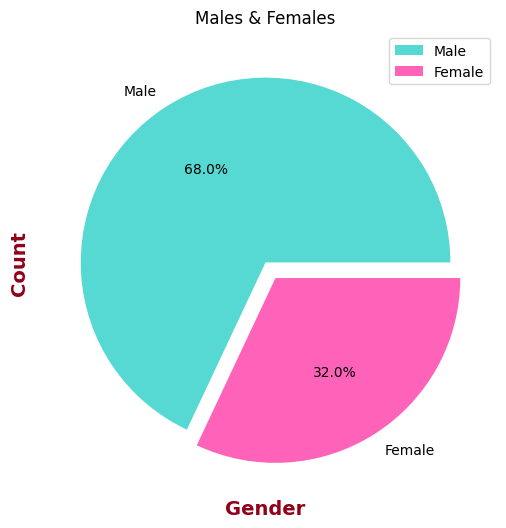

In [7]:
plt.figure(figsize = (20,6))
count = df.Gender.value_counts()
explode=(0,0.1)
count.plot(kind='pie', explode=explode,colors = ['#55d9d2','#ff63b9'], autopct='%.1f%%')
plt.title("Males & Females")
plt.xlabel('Gender',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.legend(labels=count.index, loc ='best')
plt.show()

## Age Distribution With Density Curve

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


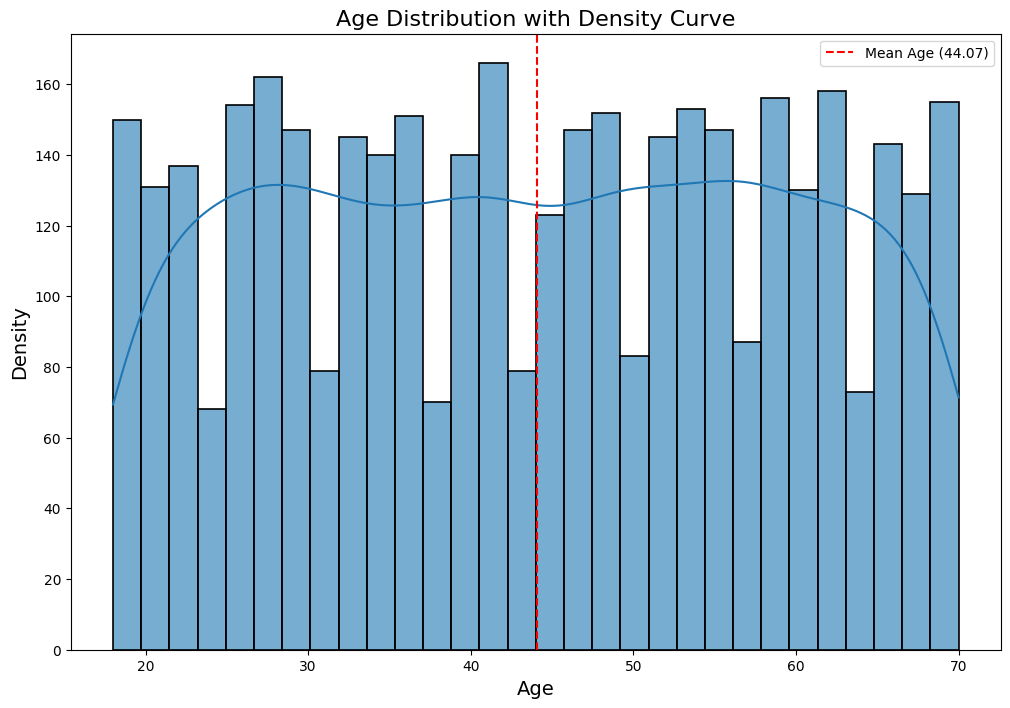

In [8]:
plt.figure(figsize=(12, 8))

sn.histplot(df['Age'], bins=30, kde=True, edgecolor='black', linewidth=1.2, alpha=0.6)

plt.title('Age Distribution with Density Curve', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

mean_age = df['Age'].mean()
plt.axvline(x=mean_age, color='red', linestyle='--', label=f'Mean Age ({mean_age:.2f})')

plt.legend()
plt.show()


## Bar Chart Showing the different categories 

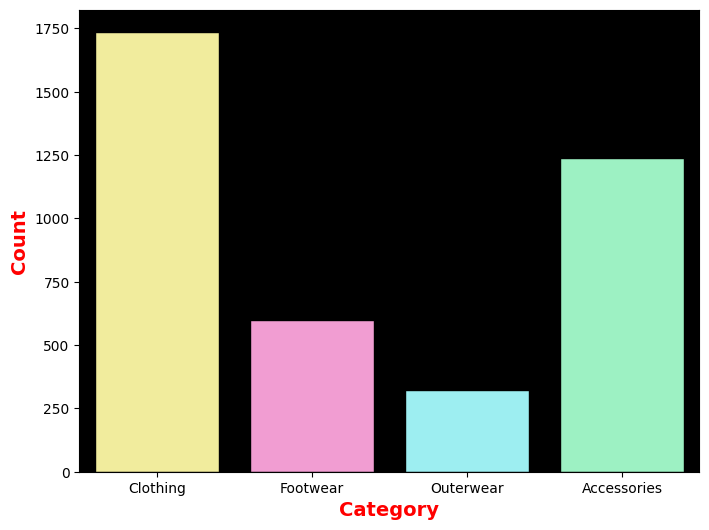

In [9]:

plt.figure(figsize=(8, 6))

# Set a dark background by modifying rcParams
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'dimgray'

custom_colors = ['#fff98f', '#ff8fd6', '#8ffbff', '#8fffc1']

sn.countplot(x='Category', data=df, palette=custom_colors, edgecolor ='black')

plt.xlabel('Category',weight = 'bold', fontsize=14, color='r')
plt.ylabel('Count',weight = 'bold', fontsize=14, color='r')

plt.show()


the Clothing Category is the best seller, on the other hand the outwear category has very low count number  

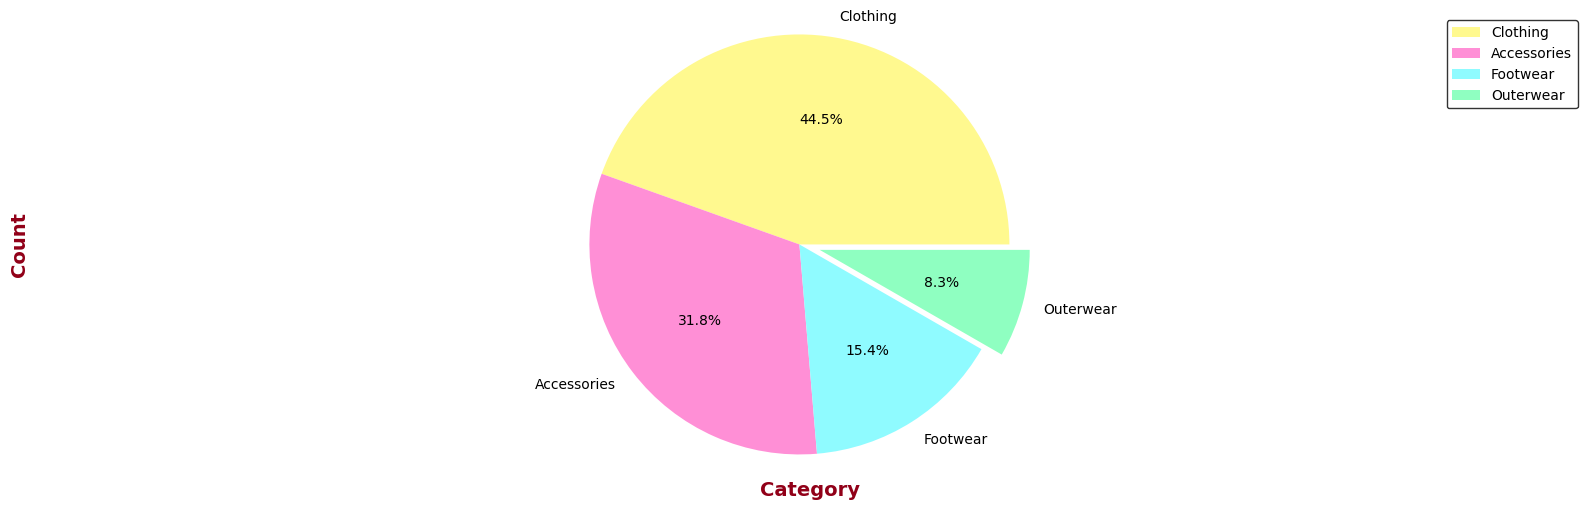

In [10]:
plt.figure(figsize = (20,6))
count = df.Category.value_counts()
explode=(0,0,0,0.1)
count.plot(kind='pie', explode=explode,colors = ['#fff98f', '#ff8fd6', '#8ffbff', '#8fffc1'], autopct='%.1f%%')
plt.xlabel('Category',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.axis('equal')
legend = plt.legend(labels=count.index, loc='best')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
plt.show()

## Bar Chart For The Items Purchased

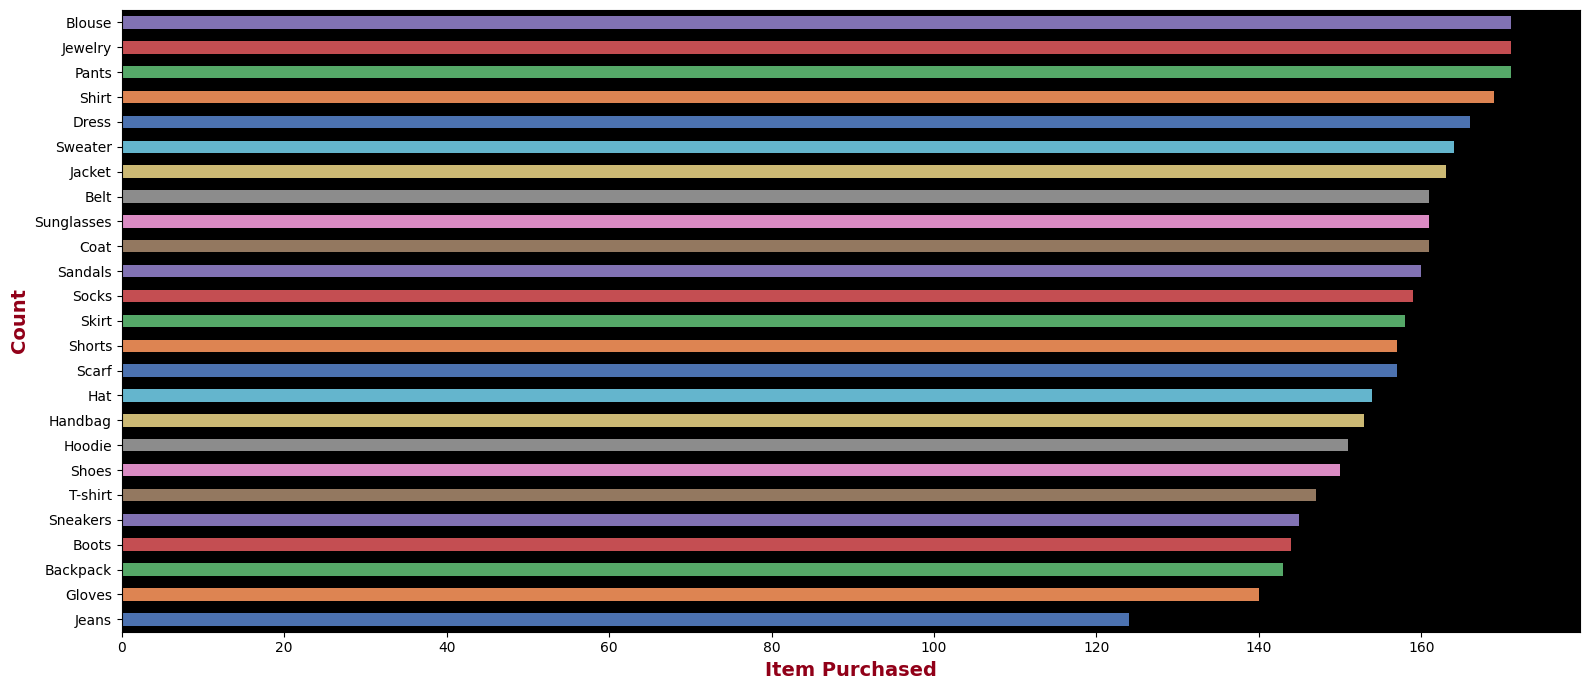

In [11]:
plt.figure(figsize = (16,7))
item_purchased = df['Item Purchased'].value_counts().sort_values(ascending= True)
item_purchased.plot(kind='barh',color = sn.color_palette('deep'))
plt.xlabel('Item Purchased',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.tight_layout()
plt.show()

Blouse,Jewelry, and Pants are the best sellers

## Bar Chart For The Size 

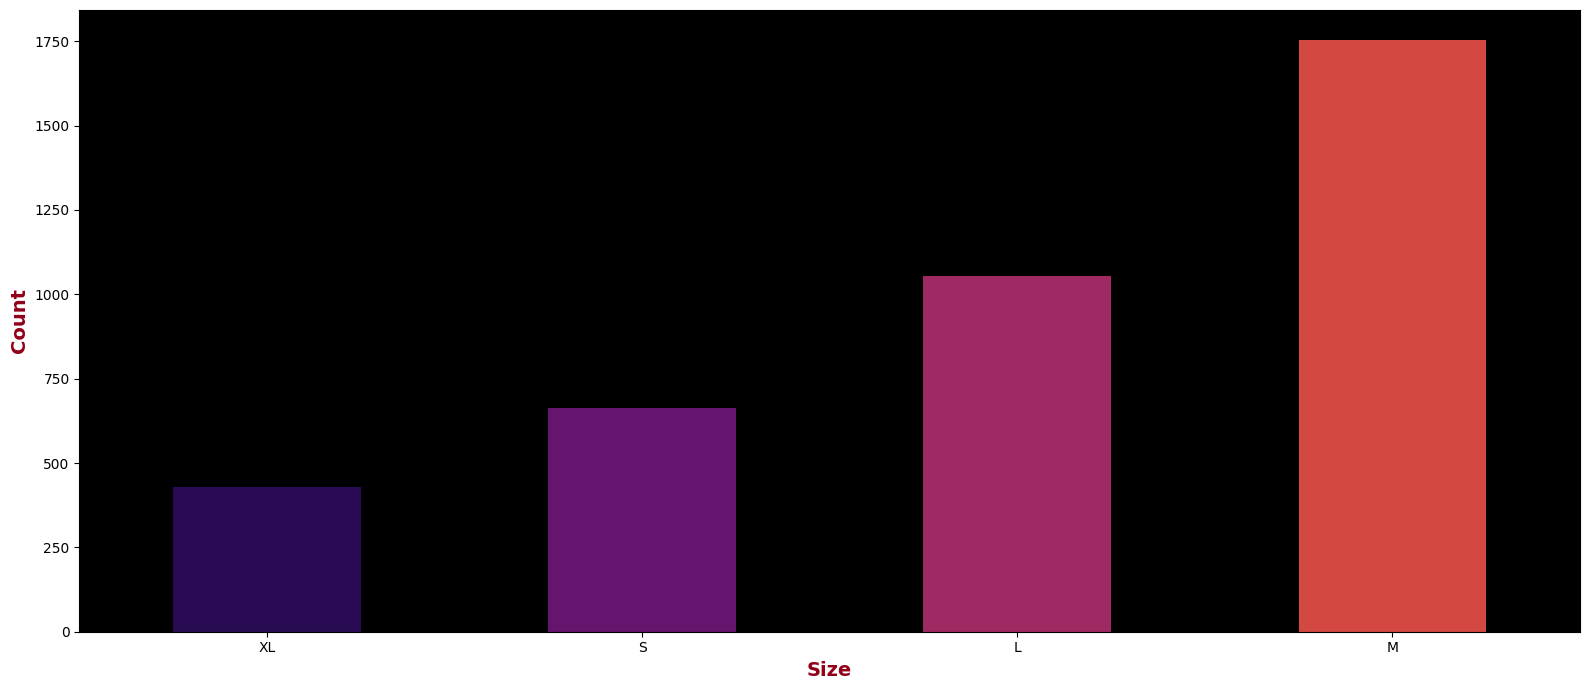

In [12]:

plt.figure(figsize = (16,7))
size = df['Size'].value_counts().sort_values(ascending= True)
size.plot(kind='bar',color = sn.color_palette('inferno'))
plt.xlabel('Size',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

the medium size is common and most of the people buy medium size

## Bar Chart For The Country

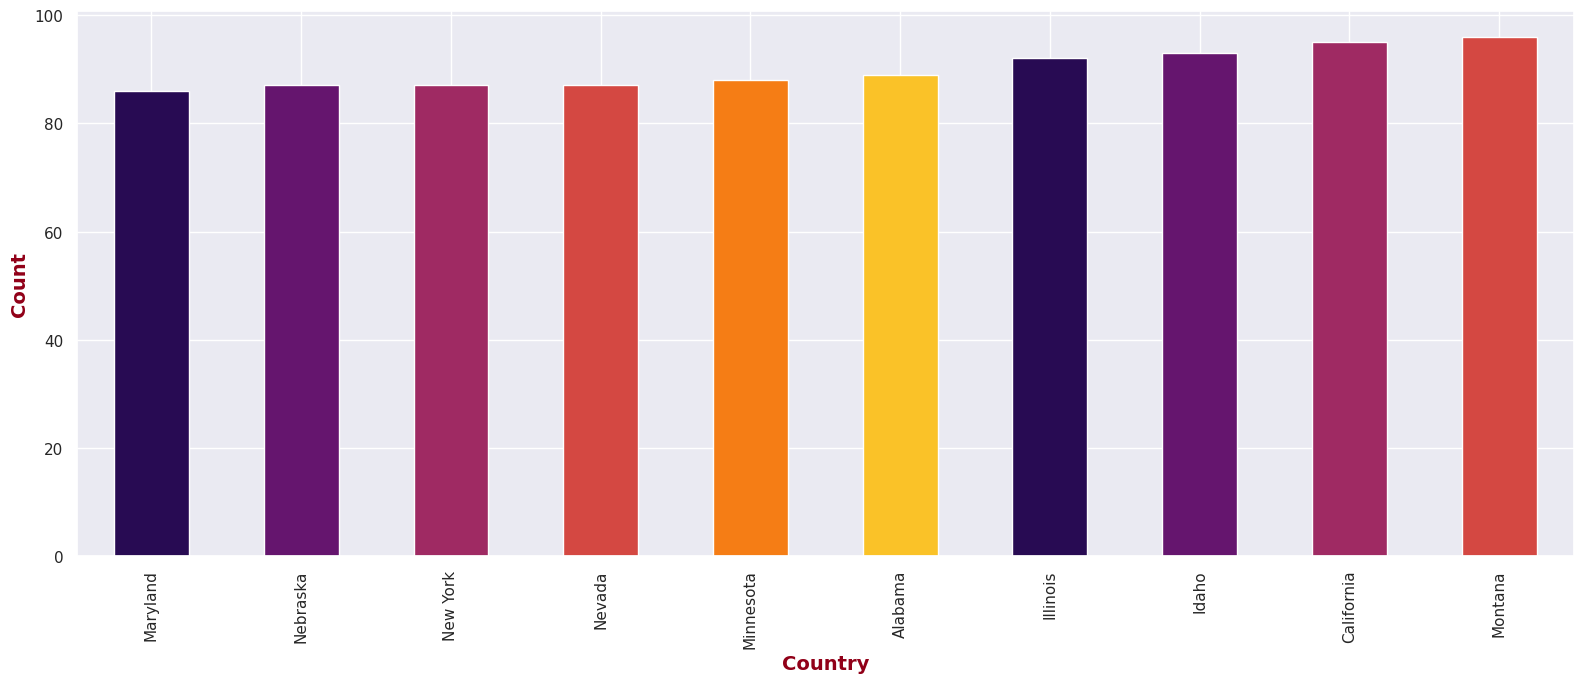

In [13]:
sn.set_theme()
plt.figure(figsize = (16,7))
locat = df['Location'].value_counts()[:10].sort_values(ascending= True)
locat.plot(kind='bar',color = sn.color_palette('inferno'))
plt.xlabel('Country',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.tight_layout()
plt.show()

## Bar Chart For The Payment Method

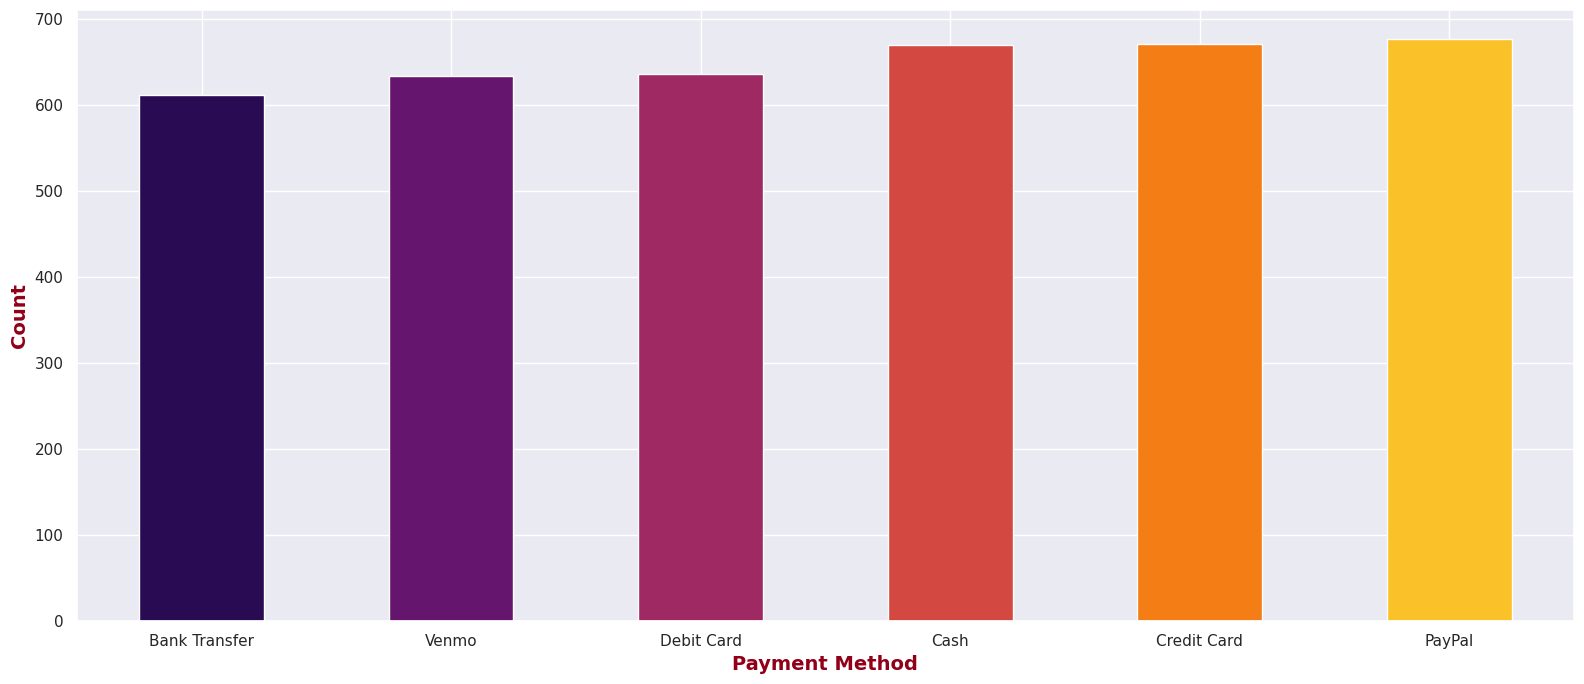

In [14]:

plt.figure(figsize = (16,7))
Payment_meth = df['Payment Method'].value_counts().sort_values(ascending= True)
Payment_meth.plot(kind='bar',color = sn.color_palette('inferno'))
plt.xlabel('Payment Method',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Most of the people pay with PayPal

## Average Age of Customers

In [15]:
avg_age=df['Age'].mean()
avg_age

44.06846153846154

## The Most Common Item Purchased

In [16]:
most_purchased=df['Item Purchased'].mode()
most_purchased

0     Blouse
1    Jewelry
2      Pants
Name: Item Purchased, dtype: object

## The Average Review Rating For Males & Females

In [17]:
avg_male_rating = df[df['Gender']=='Male']['Review Rating'].mean()
avg_female_rating = df[df['Gender']=='Female']['Review Rating'].mean()
print('The Average Review Rating For Males is: ' , np.round(avg_male_rating,2))
print('The Average Review Rating For Females is: ' , np.round(avg_female_rating,2))

The Average Review Rating For Males is:  3.75
The Average Review Rating For Females is:  3.74


## Total Purchase Amount For Each Category

In [18]:
total_purchase_for_category= df.groupby('Category')['Purchase Amount (USD)'].sum()
total_purchase_for_category

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

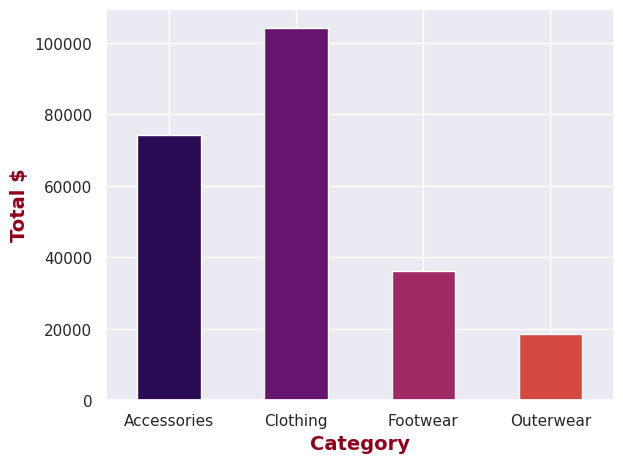

In [19]:
total_purchase_for_category.plot(kind='bar',color = sn.color_palette('inferno'))
plt.xlabel('Category',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Total $',weight = 'bold', color = '#910018', fontsize = 14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Mean Age Of Customers Who Purchase In Summer

In [20]:
avg_age_summer= df[df['Season']=='Summer']['Age'].mean()
avg_age_summer

43.973821989528794

## Most Common Category from females with rating less than 3

In [21]:
common_category_low_rating_female = df[(df['Gender']=='Female') & (df['Review Rating'] < 3 )]['Category'].mode()
common_category_low_rating_female

0    Clothing
Name: Category, dtype: object